### Geometeric transformations of Images

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

IMG_PATH = "../resource/img/landscape.jpg"
print(os.path.exists(IMG_PATH))

True


In [2]:
def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

In [3]:
img = cv2.imread(IMG_PATH)
res = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

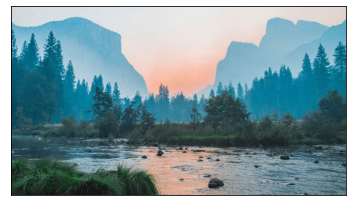

(498, 883, 3)


In [4]:
pltImage(img)
print(np.shape(img))

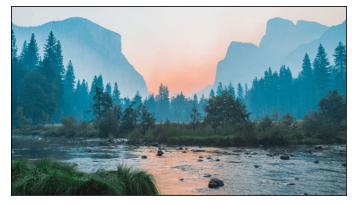

(996, 1766, 3)


In [5]:
pltImage(res)
print(np.shape(res))

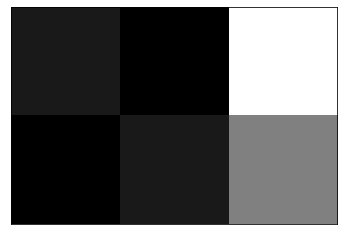

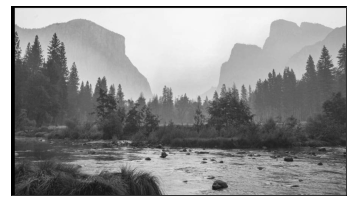

In [10]:
img = cv2.imread(IMG_PATH, 0)
rows, cols = img.shape

M = np.float32([[1, 0, 10], [0, 1, 5]])
dst = cv2.warpAffine(img, M, (cols, rows))
pltImage(M)
pltImage(dst)

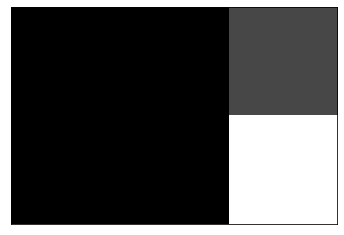

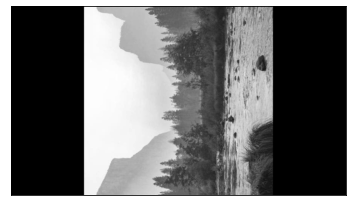

In [11]:
rows, cols = img.shape

M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(img, M, (cols, rows))
pltImage(M)
pltImage(dst)

### Affine Transformation

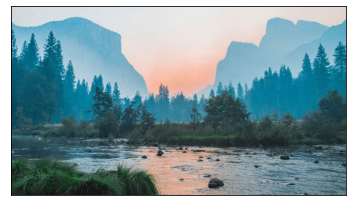

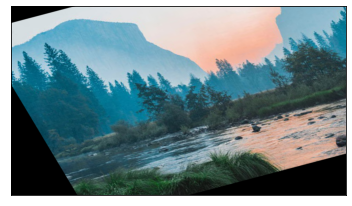

In [12]:
img = cv2.imread(IMG_PATH)
rows, cols, ch = img.shape

pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols, rows))

pltImage(img)
pltImage(dst)

### Perspective Transformation

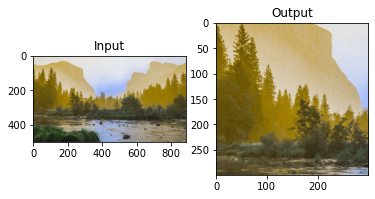

In [13]:
img = cv2.imread(IMG_PATH)
rows, cols, ch = img.shape

pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (300, 300))

plt.subplot(121)
plt.imshow(img)
plt.title('Input')

plt.subplot(122)
plt.imshow(dst)
plt.title('Output')

plt.show()